In [295]:
!pip install google-cloud google-cloud-bigquery google-auth

In [296]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [297]:
!pip install db-dtypes

In [298]:
from google.auth import load_credentials_from_file
from google.cloud.bigquery import Client

In [299]:
# credentials, project_id = load_credentials_from_file("/Users/thyneminhtetaungaung/Music Project All file /service_account.json")
credentials, project_id = load_credentials_from_file("/Users/thyneminhtetaungaung/Music Project All file /service_account.json")

In [300]:
credentials

In [301]:
type(credentials)

google.oauth2.service_account.Credentials

In [302]:
project_id

'da26-python'

In [303]:
# load data from BigQuery
client = Client(
    project = project_id,
    credentials = credentials
)

In [304]:
type(client)

google.cloud.bigquery.client.Client

In [305]:
query = "SELECT * FROM `da26-python.music_data.tracks`"

In [306]:
load_job = client.query(query)

In [307]:
data = load_job.to_dataframe()

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [308]:
def load_data(table):
    query = f"SELECT * FROM `da26-python.music_data.{table}`"
    load_job = client.query(query)
    data = load_job.to_dataframe()
    return data

In [309]:
artists = load_data("artists")

In [310]:
artists.head()

artist_id                                        name  \
0  13UwRaADQI0yTqjPBDkk6d  J-Shin (Featuring LaTocha Scott of Xscape)   
1  2LmsYeN3MzzZ9zhuZhNyqO                                     A*Teens   
2  5Q25oFANw7zA3kD2DPaJ8D                      The 2000s Karaoke Band   
3  7u7ORV6MVjId1jfJwMdakL                          2000s Karaoke Band   
4  0LyfQWJT6nXafLPZqxe9Of                             Various Artists   

   popularity  followers  
0           0        253  
1           0         10  
2           0         26  
3           0         27  
4           0    2542450

In [311]:
audio_features = load_data("audio_features")

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [312]:
audio_features.head(10)

track_id  danceability  energy   key  loudness  mode  \
0                    None           NaN     NaN   NaN       NaN   NaN   
1                    None           NaN     NaN   NaN       NaN   NaN   
2                    None           NaN     NaN   NaN       NaN   NaN   
3                    None           NaN     NaN   NaN       NaN   NaN   
4                    None           NaN     NaN   NaN       NaN   NaN   
5                    None           NaN     NaN   NaN       NaN   NaN   
6                    None           NaN     NaN   NaN       NaN   NaN   
7  3lZpvPprN56RWqDqrKy9vl          0.00   0.532   3.0    -7.447   1.0   
8  7rLDARtJALM7QdiJDMXW7m          0.25   0.215   8.0   -13.676   0.0   
9  4TbNLKRLKlxZDlS0pu7Lsy          0.25   0.136  10.0   -12.162   1.0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0          NaN           NaN               NaN       NaN      NaN      NaN   
1          NaN           NaN               NaN       NaN      NaN      NaN   
2          NaN           NaN               NaN       NaN      NaN      NaN   
3          NaN           NaN               NaN       NaN      NaN      NaN   
4          NaN           NaN               NaN       NaN      NaN      NaN   
5          NaN           NaN               NaN       NaN      NaN      NaN   
6          NaN           NaN               NaN       NaN      NaN      NaN   
7        0.000         0.976          0.000000     0.000   0.0000    0.000   
8        0.037         0.632          0.071700     0.401   0.0746  174.824   
9        0.037         0.673          0.000157     0.107   0.0981  118.086   

   time_signature  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
5             NaN  
6             NaN  
7             0.0  
8             3.0  
9             4.0

In [313]:
audio_features.sample(10)

track_id  danceability  energy   key  loudness  mode  \
8278  6V5r8IMSL7wTZlFmi8AjR0         0.805   0.723   7.0    -6.808   1.0   
2902  0KAzP1Rbp0Vz5pw8i1KDDI         0.398   0.489   0.0    -6.071   1.0   
4446  733c1CWmIGymoQXdp7Us88         0.819   0.654  11.0    -6.665   0.0   
9773  7bcinCjd50wHDroef8TbEe         0.411   0.558   3.0    -7.393   1.0   
3749  43fLwpwHvUnIFi7NqRKdhV         0.611   0.270  10.0    -9.842   1.0   
3761  7FpBQ067pHB67deawpbbcY         0.736   0.458   5.0    -7.437   1.0   
8997  2hgzdQdnfWwtdpZbhZlV72         0.757   0.678   8.0    -5.529   0.0   
3350  1GIjlB6dx1nnY8obBcT57i         0.766   0.697  11.0    -4.489   0.0   
8991  54S3uCvfZauNw8lVCHZYYo         0.757   0.652   5.0   -10.980   1.0   
6239  43Z2NVNkX2TuDymLQ89pI2         0.699   0.837   2.0    -5.173   1.0   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
8278       0.2240       0.00679          0.000000    0.2440    0.641   88.006   
2902       0.0328       0.84100          0.000000    0.1030    0.196   73.987   
4446       0.1360       0.51700          0.000000    0.0996    0.455  133.503   
9773       0.0380       0.16200          0.000004    0.0879    0.379   81.274   
3749       0.0445       0.87900          0.000000    0.2790    0.610  129.222   
3761       0.0316       0.44100          0.000000    0.1480    0.650   98.977   
8997       0.2330       0.04720          0.000009    0.0654    0.820  120.075   
3350       0.0531       0.08020          0.865000    0.1330    0.597  119.994   
8991       0.0400       0.66900          0.024600    0.2000    0.962   97.651   
6239       0.0428       0.10300          0.000000    0.2310    0.348   95.493   

      time_signature  
8278             4.0  
2902             4.0  
4446             4.0  
9773             4.0  
3749             4.0  
3761             4.0  
8997             4.0  
3350             4.0  
8991             4.0  
6239             4.0

In [314]:
audio_features.tail(10)

track_id  danceability  energy   key  loudness  mode  \
10773  1wva1IlWLDNLgwipUWcmjy         0.756   0.829  11.0    -3.973   1.0   
10774  5Odq8ohlgIbQKMZivbWkEo         0.881   0.592   2.0    -4.898   1.0   
10775  3wMUvT6eIw2L5cZFG1yH9j         0.881   0.663   2.0    -6.822   1.0   
10776  0GR7iJLhj80KD5LkA14ZRn         0.881   0.546   2.0    -7.566   1.0   
10777  7nDtDxsKJ3fho8xEmU65JJ         0.881   0.830   7.0    -4.563   1.0   
10778  2Ec33AVlkTTq8BHFgBTdQs         0.881   0.457   7.0    -8.191   0.0   
10779  3KixNgUEaDtrKJVzdqjU5q         0.881   0.636   7.0    -4.629   1.0   
10780  4ANFPo7dzs2DdPuONXC9bp         0.881   0.549  10.0    -5.589   1.0   
10781  5wfllwdjglyQislkskYLBv         0.881   0.442  11.0    -6.278   0.0   
10782  3EikYy40GMSp8l5mDV6IQo         0.881   0.623   1.0    -9.662   1.0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
10773       0.0682       0.00300          0.000035    0.0578    0.504   
10774       0.0324       0.61900          0.000013    0.0901    0.719   
10775       0.0827       0.00683          0.000000    0.1420    0.586   
10776       0.1200       0.00296          0.000005    0.2260    0.276   
10777       0.1720       0.01440          0.007710    0.0626    0.765   
10778       0.1560       0.03270          0.000000    0.2310    0.296   
10779       0.2870       0.00606          0.000000    0.1110    0.715   
10780       0.2720       0.00910          0.000000    0.1370    0.202   
10781       0.0651       0.48000          0.000009    0.1200    0.803   
10782       0.1190       0.25700          0.000002    0.0964    0.744   

         tempo  time_signature  
10773  120.163             4.0  
10774  101.058             4.0  
10775   81.374             4.0  
10776  140.032             4.0  
10777   98.793             4.0  
10778  136.970             4.0  
10779  163.949             4.0  
10780  144.019             4.0  
10781  138.014             4.0  
10782   88.953             4.0

In [315]:
chart_positions = load_data("chart_positions")
chart_positions.head(10)

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


chart_week  list_position                track_id
0  2021-07-10             42  000TJlEJQ3nafsm1hBWpoj
1  2003-07-19             60  003FTlCpBTM4eSqYSWPv4H
2  2003-07-26             60  003FTlCpBTM4eSqYSWPv4H
3  2003-08-02             64  003FTlCpBTM4eSqYSWPv4H
4  2003-07-12             66  003FTlCpBTM4eSqYSWPv4H
5  2003-08-09             66  003FTlCpBTM4eSqYSWPv4H
6  2003-06-28             67  003FTlCpBTM4eSqYSWPv4H
7  2003-07-05             67  003FTlCpBTM4eSqYSWPv4H
8  2003-06-21             71  003FTlCpBTM4eSqYSWPv4H
9  2003-08-16             85  003FTlCpBTM4eSqYSWPv4H

In [316]:
tracks = load_data("tracks")
tracks.head(10)

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


track_id                                               name  \
0  5CMVGP24paZIukljDj0iWc           Jingle Bells (with The Ken Lane Singers)   
1  25leEEaz1gIpp7o21Fqyjo  Here Comes Santa Claus (Right Down Santa Claus...   
2  1dtIaSlyrLI04sqYa8nLyN                     Rudolph the Red-Nosed Reindeer   
3  4PS1e8f2LvuTFgUs1Cn3ON        The Christmas Song (Merry Christmas To You)   
4  4PS1e8f2LvuTFgUs1Cn3ON        The Christmas Song (Merry Christmas To You)   
5  4PS1e8f2LvuTFgUs1Cn3ON        The Christmas Song (Merry Christmas To You)   
6  5ASM6Qjiav2xPe7gRkQMsQ                                        Sleigh Ride   
7  46pF1zFimM582ss1PrMy68                  Christmas (Baby Please Come Home)   
8  7uyivkbdc8iH8wyBGBhlXV                                    One More Chance   
9  2uX5f3x2cObov0iDAPln4o                                  Song of the South   

   duration_ms release_date   album_type  explicit  
0       156666         1945  compilation     False  
1       150266         1947        album     False  
2       186733         1947        album     False  
3       192160         1962        album     False  
4       192160         1962        album     False  
5       192160         1962        album     False  
6       181266         1963  compilation     False  
7       166453         1963  compilation     False  
8       229000         1979  compilation     False  
9       190800         1980        album     False

In [317]:
tracks_artists_mapping = load_data("tracks_artists_mapping")
tracks_artists_mapping.head(10)

/opt/anaconda3/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


artist_id                track_id
0               artist_id                track_id
1  00FQb4jTyendYWaN8pK0wa  4zmKGsrXjLmljb5fTaBTot
2  00FQb4jTyendYWaN8pK0wa  6GGtHZgBycCgGBUhZo81xe
3  00FQb4jTyendYWaN8pK0wa  22DH8NChecsgPxDjA4pqer
4  00FQb4jTyendYWaN8pK0wa  7JVNRVPeXFAOdMrxOHNjVv
5  00FQb4jTyendYWaN8pK0wa  24jvD83UgLmrdGjhWTFslY
6  00FQb4jTyendYWaN8pK0wa  2nMeu6UenVvwUktBCpLMK9
7  00FQb4jTyendYWaN8pK0wa  6PUIzlqotEmPuBfjbwYWOB
8  00FQb4jTyendYWaN8pK0wa  5Y6nVaayzitvsD5F7nr3DV
9  00FQb4jTyendYWaN8pK0wa  4VSg5K1hnbmIg4PwRdY6wV

In [318]:
audio_features.shape

(10783, 13)

In [319]:
audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10783 entries, 0 to 10782
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          10776 non-null  object 
 1   danceability      10776 non-null  float64
 2   energy            10776 non-null  float64
 3   key               10776 non-null  float64
 4   loudness          10776 non-null  float64
 5   mode              10776 non-null  float64
 6   speechiness       10776 non-null  float64
 7   acousticness      10776 non-null  float64
 8   instrumentalness  10776 non-null  float64
 9   liveness          10776 non-null  float64
 10  valence           10776 non-null  float64
 11  tempo             10776 non-null  float64
 12  time_signature    10776 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


In [320]:
audio_features.columns

Index(['track_id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [321]:
# checking null data (for all column)
audio_features.loc[audio_features.isnull().any(axis = 1)]

track_id  danceability  energy  key  loudness  mode  speechiness  \
0     None           NaN     NaN  NaN       NaN   NaN          NaN   
1     None           NaN     NaN  NaN       NaN   NaN          NaN   
2     None           NaN     NaN  NaN       NaN   NaN          NaN   
3     None           NaN     NaN  NaN       NaN   NaN          NaN   
4     None           NaN     NaN  NaN       NaN   NaN          NaN   
5     None           NaN     NaN  NaN       NaN   NaN          NaN   
6     None           NaN     NaN  NaN       NaN   NaN          NaN   

   acousticness  instrumentalness  liveness  valence  tempo  time_signature  
0           NaN               NaN       NaN      NaN    NaN             NaN  
1           NaN               NaN       NaN      NaN    NaN             NaN  
2           NaN               NaN       NaN      NaN    NaN             NaN  
3           NaN               NaN       NaN      NaN    NaN             NaN  
4           NaN               NaN       NaN      NaN    NaN             NaN  
5           NaN               NaN       NaN      NaN    NaN             NaN  
6           NaN               NaN       NaN      NaN    NaN             NaN

In [322]:
# drop NA for 7 rows 
audio_features.dropna(inplace = True)

In [323]:
# Getting new dataset_without NA
audio_features.reset_index(drop = True, inplace = True)

In [324]:
# change data type from floats to int for three column - Key, Mode, Time-Signature
audio_features["key"]= audio_features["key"].astype(int)
audio_features["mode"]= audio_features["mode"].astype(int)
audio_features["time_signature"]= audio_features["time_signature"].astype(int)


In [325]:
#Cleaning Tracks file / Check info first 
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11070 entries, 0 to 11069
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      11070 non-null  object 
 1   name          11070 non-null  object 
 2   duration_ms   11070 non-null  Int64  
 3   release_date  11070 non-null  object 
 4   album_type    11070 non-null  object 
 5   explicit      11070 non-null  boolean
dtypes: Int64(1), boolean(1), object(4)
memory usage: 465.0+ KB


In [326]:
#checking date and count value in Release_date 
tracks["release_date"].value_counts()

release_date
2013-01-01    153
2011-01-01    130
2009-01-01    127
2006-01-01    125
2010-01-01    116
             ... 
2013-11-03      1
2013-10-28      1
2013-10-25      1
2013-10-21      1
2024-09-19      1
Name: count, Length: 2440, dtype: int64

In [327]:
# Checking Unique Date format 
tracks["release_date"].unique()

array(['1945', '1947', '1962', ..., '2024-09-12', '2024-09-14',
       '2024-09-19'], dtype=object)

In [328]:
# Changing datetime format. However, It is the same. 
#  tracks["release_date"] = pd.to_datetime(tracks["release_date"], errors = "coerce")

In [329]:
# Checking Null data/ There is no null. 
tracks.isnull().sum()

track_id        0
name            0
duration_ms     0
release_date    0
album_type      0
explicit        0
dtype: int64

In [330]:
# release date data to year colum
def func(item):
    day = item.split("-")
    if len(day) == 1:
        return int(day[0]),0,0
    elif len(day) == 2:
        return int(day[0]), int(day[1]), 0
    else:
        return int(day[0]), int(day[1]), int(day[2])

tracks[["year","month","day"]] = tracks["release_date"].apply(lambda x:pd.Series(func(x)))
print(tracks[["year","month","day"]])

       year  month  day
0      1945      0    0
1      1947      0    0
2      1947      0    0
3      1962      0    0
4      1962      0    0
...     ...    ...  ...
11065  2024     10    1
11066  2024     10    1
11067  2024     10    1
11068  2024     10    4
11069  2024     10   11

[11070 rows x 3 columns]


In [331]:
#Check data info again 
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11070 entries, 0 to 11069
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      11070 non-null  object 
 1   name          11070 non-null  object 
 2   duration_ms   11070 non-null  Int64  
 3   release_date  11070 non-null  object 
 4   album_type    11070 non-null  object 
 5   explicit      11070 non-null  boolean
 6   year          11070 non-null  int64  
 7   month         11070 non-null  int64  
 8   day           11070 non-null  int64  
dtypes: Int64(1), boolean(1), int64(3), object(4)
memory usage: 724.4+ KB


In [332]:
tracks.to_csv("tracks_update.csv")

In [333]:
tracks.month.loc[tracks.month==0]


0       0
1       0
2       0
3       0
4       0
       ..
6914    0
6915    0
6916    0
6917    0
6918    0
Name: month, Length: 416, dtype: int64

In [334]:
tracks.year.loc[tracks.year!=0]

0        1945
1        1947
2        1947
3        1962
4        1962
         ... 
11065    2024
11066    2024
11067    2024
11068    2024
11069    2024
Name: year, Length: 11070, dtype: int64

In [335]:
tracks.day.loc[tracks.day!=0]

349       1
350       1
351       1
352      15
353       2
         ..
11065     1
11066     1
11067     1
11068     4
11069    11
Name: day, Length: 10652, dtype: int64

In [336]:
# artists data cleaning/ checking info first / nothing need to change 
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   artist_id   3108 non-null   object
 1   name        3108 non-null   object
 2   popularity  3108 non-null   Int64 
 3   followers   3108 non-null   Int64 
dtypes: Int64(2), object(2)
memory usage: 103.3+ KB


In [337]:
# tracks_artists_mapping data cleaning/ checking info first / nothing need to change 
tracks_artists_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15048 entries, 0 to 15047
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   artist_id  15048 non-null  object
 1   track_id   15048 non-null  object
dtypes: object(2)
memory usage: 235.3+ KB


In [338]:
# chart_positions data cleaning/ checking info first / nothing need to change 
chart_positions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129305 entries, 0 to 129304
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   chart_week     129305 non-null  dbdate
 1   list_position  129305 non-null  Int64 
 2   track_id       129305 non-null  object
dtypes: Int64(1), dbdate(1), object(1)
memory usage: 3.1+ MB


In [339]:
# Merge Data for all data sets. 
master_data = tracks.merge(tracks_artists_mapping, on="track_id").merge(artists, on="artist_id").merge(chart_positions, on="track_id").merge(audio_features, on="track_id")

In [340]:
# Checking dublicate/ how many
master_data.duplicated().sum()

12837

In [341]:
#remove dublicate from combine data
master_data.drop_duplicates(inplace=True)
master_data.reset_index(inplace=True)

In [342]:
# Checking combine dataset information 
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175449 entries, 0 to 175448
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             175449 non-null  int64  
 1   track_id          175449 non-null  object 
 2   name_x            175449 non-null  object 
 3   duration_ms       175449 non-null  Int64  
 4   release_date      175449 non-null  object 
 5   album_type        175449 non-null  object 
 6   explicit          175449 non-null  boolean
 7   year              175449 non-null  int64  
 8   month             175449 non-null  int64  
 9   day               175449 non-null  int64  
 10  artist_id         175449 non-null  object 
 11  name_y            175449 non-null  object 
 12  popularity        175449 non-null  Int64  
 13  followers         175449 non-null  Int64  
 14  chart_week        175449 non-null  dbdate 
 15  list_position     175449 non-null  Int64  
 16  danceability      17

In [343]:
# Checking null data in combine data. 
master_data.loc[master_data.isnull().any(axis = 1)]

Empty DataFrame
Columns: [index, track_id, name_x, duration_ms, release_date, album_type, explicit, year, month, day, artist_id, name_y, popularity, followers, chart_week, list_position, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature]
Index: []

[0 rows x 28 columns]

In [344]:
master_data.rename(columns={'name_x': 'track_name', 'name_y': 'artist_name'}, inplace=True)


In [345]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175449 entries, 0 to 175448
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             175449 non-null  int64  
 1   track_id          175449 non-null  object 
 2   track_name        175449 non-null  object 
 3   duration_ms       175449 non-null  Int64  
 4   release_date      175449 non-null  object 
 5   album_type        175449 non-null  object 
 6   explicit          175449 non-null  boolean
 7   year              175449 non-null  int64  
 8   month             175449 non-null  int64  
 9   day               175449 non-null  int64  
 10  artist_id         175449 non-null  object 
 11  artist_name       175449 non-null  object 
 12  popularity        175449 non-null  Int64  
 13  followers         175449 non-null  Int64  
 14  chart_week        175449 non-null  dbdate 
 15  list_position     175449 non-null  Int64  
 16  danceability      17

In [346]:
master_data.columns


Index(['index', 'track_id', 'track_name', 'duration_ms', 'release_date',
       'album_type', 'explicit', 'year', 'month', 'day', 'artist_id',
       'artist_name', 'popularity', 'followers', 'chart_week', 'list_position',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

In [347]:
# Drop Index Column
master_data.drop(columns= "index", inplace = True)
master_data = master_data.reset_index(drop=True)

In [348]:
# Checking duplicate before analysis Audio Features
master_data.duplicated().sum()

0

# Popular_Audiofeatures Analysis 

## Identifying Live-Event-Friendly Tracks

In [349]:
#checking top track with popularity 
master_data.groupby("track_name").popularity.max().sort_values(ascending = False).head(30)

track_name
"Slut!" (Taylor's Version) (From The Vault)                                             100
Starlight (Taylor's Version)                                                            100
Haunted (Taylor's Version)                                                              100
Haunted                                                                                 100
Christmas Tree Farm                                                                     100
Christmas Tree Farm (Old Timey Version)                                                 100
The Albatross                                                                           100
The Alchemy                                                                             100
The Archer                                                                              100
The Black Dog                                                                           100
The Bolter                                                           

In [350]:
# Which tracks with high popularity scores also have high liveness, energy, and danceability values, making them suitable for live performances?
master_data.groupby(["track_name","artist_name"])[["popularity","liveness","valence","danceability","energy"]].sum().sort_values(ascending = False,by = ["popularity","energy","danceability","liveness","valence"]).head(200)

popularity  liveness  \
track_name                              artist_name                             
You Belong With Me                      Taylor Swift           8700    9.9180   
Blinding Lights                         The Weeknd             8640    8.0730   
1, 2 Step (feat. Missy Elliott)         Ciara                  7848    4.1311   
                                        Missy Elliott          7848    4.1311   
Radioactive                             Imagine Dragons        7743   58.1160   
...                                                             ...       ...   
This Love                               Maroon 5               3741    3.9990   
Kiss Me More (feat. SZA)                Doja Cat               3741    5.1600   
You Right                               Doja Cat               3741    3.6335   
For The Night (feat. Lil Baby & DaBaby) Lil Baby               3741    8.2990   
Give Me Everything (feat. Nayer)        Ne-Yo                  3735   13.6350   

                                                         valence  \
track_name                              artist_name                
You Belong With Me                      Taylor Swift      38.541   
Blinding Lights                         The Weeknd        30.060   
1, 2 Step (feat. Missy Elliott)         Ciara             91.778   
                                        Missy Elliott     91.778   
Radioactive                             Imagine Dragons   20.619   
...                                                          ...   
This Love                               Maroon 5          34.787   
Kiss Me More (feat. SZA)                Doja Cat          33.583   
You Right                               Doja Cat          18.748   
For The Night (feat. Lil Baby & DaBaby) Lil Baby          14.921   
Give Me Everything (feat. Nayer)        Ne-Yo             24.120   

                                                         danceability  energy  
track_name                              artist_name                            
You Belong With Me                      Taylor Swift           59.769  68.121  
Blinding Lights                         The Weeknd             46.170  65.700  
1, 2 Step (feat. Missy Elliott)         Ciara                 102.896  55.699  
                                        Missy Elliott         102.896  55.699  
Radioactive                             Imagine Dragons        38.976  68.208  
...                                                               ...     ...  
This Love                               Maroon 5               30.616  37.066  
Kiss Me More (feat. SZA)                Doja Cat               32.852  30.315  
You Right                               Doja Cat               35.604  26.703  
For The Night (feat. Lil Baby & DaBaby) Lil Baby               35.389  25.198  
Give Me Everything (feat. Nayer)        Ne-Yo                  30.285  41.940  

[200 rows x 5 columns]

In [351]:
master_data.groupby(["track_name","artist_name"])[["popularity","liveness","valence","danceability","energy"]].sum().sort_values(ascending = False,by = ["popularity","energy","danceability","liveness","valence"]).head(200)

popularity  liveness  \
track_name                              artist_name                             
You Belong With Me                      Taylor Swift           8700    9.9180   
Blinding Lights                         The Weeknd             8640    8.0730   
1, 2 Step (feat. Missy Elliott)         Ciara                  7848    4.1311   
                                        Missy Elliott          7848    4.1311   
Radioactive                             Imagine Dragons        7743   58.1160   
...                                                             ...       ...   
This Love                               Maroon 5               3741    3.9990   
Kiss Me More (feat. SZA)                Doja Cat               3741    5.1600   
You Right                               Doja Cat               3741    3.6335   
For The Night (feat. Lil Baby & DaBaby) Lil Baby               3741    8.2990   
Give Me Everything (feat. Nayer)        Ne-Yo                  3735   13.6350   

                                                         valence  \
track_name                              artist_name                
You Belong With Me                      Taylor Swift      38.541   
Blinding Lights                         The Weeknd        30.060   
1, 2 Step (feat. Missy Elliott)         Ciara             91.778   
                                        Missy Elliott     91.778   
Radioactive                             Imagine Dragons   20.619   
...                                                          ...   
This Love                               Maroon 5          34.787   
Kiss Me More (feat. SZA)                Doja Cat          33.583   
You Right                               Doja Cat          18.748   
For The Night (feat. Lil Baby & DaBaby) Lil Baby          14.921   
Give Me Everything (feat. Nayer)        Ne-Yo             24.120   

                                                         danceability  energy  
track_name                              artist_name                            
You Belong With Me                      Taylor Swift           59.769  68.121  
Blinding Lights                         The Weeknd             46.170  65.700  
1, 2 Step (feat. Missy Elliott)         Ciara                 102.896  55.699  
                                        Missy Elliott         102.896  55.699  
Radioactive                             Imagine Dragons        38.976  68.208  
...                                                               ...     ...  
This Love                               Maroon 5               30.616  37.066  
Kiss Me More (feat. SZA)                Doja Cat               32.852  30.315  
You Right                               Doja Cat               35.604  26.703  
For The Night (feat. Lil Baby & DaBaby) Lil Baby               35.389  25.198  
Give Me Everything (feat. Nayer)        Ne-Yo                  30.285  41.940  

[200 rows x 5 columns]

In [352]:
# Which tracks with high popularity scores also have high danceability values, making them suitable for live performances?
master_data.groupby(["track_name","artist_name"])[["popularity","danceability"]].sum().sort_values(ascending = False,by = ["danceability","popularity"]).head(20)

popularity  danceability
track_name                      artist_name                             
1, 2 Step (feat. Missy Elliott) Ciara                 7848       102.896
                                Missy Elliott         7848       102.896
Heat Waves                      Glass Animals         7098        69.251
Wow.                            Post Malone           7636        68.807
Sail                            AWOLNATION            4977        65.254
You Belong With Me              Taylor Swift          8700        59.769
Party Rock Anthem               LMFAO                 5372        59.250
                                GoonRock              4977        59.250
                                Lauren Bennett        4898        59.250
Sucker                          Jonas Brothers        5168        57.256
I'm Yours                       Jason Mraz            5548        53.428
Somebody That I Used To Know    Gotye                 4248        50.976
                                Kimbra                4248        50.976
Uptown Funk (feat. Bruno Mars)  Bruno Mars            5264        47.936
                                Mark Ronson           4312        47.936
Shape of You                    Ed Sheeran            5162        47.850
Big Energy                      Latto                 4080        47.685
Rolling in the Deep             Adele                 5720        47.450
WHATS POPPIN                    Jack Harlow           4080        47.073
Save Your Tears                 The Weeknd            6624        46.851

In [398]:
# Which tracks with high popularity scores also have high danceability values, making them suitable for live performances?
master_data.groupby(["track_name","artist_name"])[["popularity","energy"]].sum().sort_values(ascending = False,by = ["popularity","energy"]).head(20)

popularity  energy
track_name                      artist_name                        
You Belong With Me              Taylor Swift           8700  68.121
Blinding Lights                 The Weeknd             8640  65.700
1, 2 Step (feat. Missy Elliott) Ciara                  7848  55.699
                                Missy Elliott          7848  55.699
Radioactive                     Imagine Dragons        7743  68.208
Wow.                            Post Malone            7636  44.654
Heat Waves                      Glass Animals          7098  47.775
Save Your Tears                 The Weeknd             6624  56.925
Snooze                          SZA                    6300  38.570
STAY (with Justin Bieber)       Justin Bieber          6006  50.424
Something in the Orange         Zach Bryan             6006  12.672
Counting Stars                  OneRepublic            5780  48.008
Rolling in the Deep             Adele                  5720  49.985
U My Everything (feat. Drake)   Drake                  5664  46.964
You Proof                       Morgan Wallen          5642  50.716
Circles                         Post Malone            5612  46.543
STAY (with Justin Bieber)       The Kid LAROI          5610  50.424
I'm Yours                       Jason Mraz             5548  33.744
Last Night                      Morgan Wallen          5460  40.380
Demons                          Imagine Dragons        5429  43.310

In [354]:
# Which tracks with high popularity scores also have high danceability values, making them suitable for live performances?
master_data.groupby(["track_name","artist_name"])[["popularity","valence"]].sum().sort_values(ascending = False,by = ["popularity","valence"]).head(20)

popularity  valence
track_name                      artist_name                         
You Belong With Me              Taylor Swift           8700   38.541
Blinding Lights                 The Weeknd             8640   30.060
1, 2 Step (feat. Missy Elliott) Ciara                  7848   91.778
                                Missy Elliott          7848   91.778
Radioactive                     Imagine Dragons        7743   20.619
Wow.                            Post Malone            7636   32.287
Heat Waves                      Glass Animals          7098   48.321
Save Your Tears                 The Weeknd             6624   44.436
Snooze                          SZA                    6300   27.440
STAY (with Justin Bieber)       Justin Bieber          6006   31.548
Something in the Orange         Zach Bryan             6006    9.768
Counting Stars                  OneRepublic            5780   32.232
Rolling in the Deep             Adele                  5720   32.955
U My Everything (feat. Drake)   Drake                  5664   41.536
You Proof                       Morgan Wallen          5642   42.222
Circles                         Post Malone            5612   33.611
STAY (with Justin Bieber)       The Kid LAROI          5610   31.548
I'm Yours                       Jason Mraz             5548   54.112
Last Night                      Morgan Wallen          5460   29.280
Demons                          Imagine Dragons        5429   25.559

In [355]:
#Merging two dataset - tracks_artists_mapping and Track
track_artist = tracks.merge(tracks_artists_mapping, on="track_id").merge(artists, on="artist_id")
track_artist.rename(columns={'name_x': 'track_name', 'name_y': 'artist_name'}, inplace=True)

In [356]:
# Checking only Track popularity 
track_artist.groupby("track_name")["popularity"].sum().sort_values(ascending = False)

track_name
CARNIVAL                                                                                    1542
1, 2 Step (feat. Missy Elliott)                                                             1296
You                                                                                         1144
JUST STAND UP!                                                                              1125
Do You Mind (feat. Nicki Minaj, Chris Brown, August Alsina, Jeremih, Future & Rick Ross)    1114
                                                                                            ... 
Me Against The Music (In the style of Britney Spears featuring Madonna)                        0
Drop That Thun Thun                                                                            0
One Night Stand (feat. LaTocha Scott of Xscape)                                                0
All I Have (In the style of Jennifer Lopez featuring LL Cool J)                                0
6IX9INE (ZAZA WAVE 

In [357]:
# Change Datetime at Chart_week
master_data.chart_week = pd.to_datetime(master_data.chart_week)
master_data.chart_week.dtype


dtype('<M8[ns]')

In [465]:
master_data.chart_week.dt.year

0         2023
1         2024
2         2023
3         2024
4         2024
5         2023
6         2022
7         2023
8         2021
9         2023
10        2019
11        2023
12        2020
13        2018
14        2020
15        2020
16        2022
17        2022
18        2023
19        2018
20        2022
21        2019
22        2019
23        2020
24        2023
25        2023
26        2023
27        2024
28        2023
29        2022
30        2022
31        2023
32        2019
33        2021
34        2022
35        2024
36        2022
37        2023
38        2023
39        2020
40        2021
41        2020
42        2020
43        2022
44        2018
45        2022
46        2000
47        2000
48        2020
49        2021
50        2023
51        2021
52        2018
53        2018
54        2019
55        2019
56        2019
57        2022
58        2016
59        2017
60        2018
61        2017
62        2018
63        2023
64        2021
65        2014
66        

In [383]:
# Popular Track Monthly Filter by Year 
Track_Feature = master_data.loc[master_data.chart_week.dt.year == 2020].groupby([master_data.chart_week.dt.month,'track_name'])['list_position'].sum().unstack().idxmin(axis=1)

In [ ]:
#Filter Name for popular Track by Month/ haven't finish yet. 
master_data.loc[(master_data.chart_week.dt.year == 2020)&(master_data.track_name.isin(list(Track_Feature)))]["artist_name"].drop_duplicates()

6610            Redbone
6873       Mariah Carey
93897        The Weeknd
96423               BTS
96694      Taylor Swift
156291      Roddy Ricch
157719            Drake
159582         Lil Durk
159903      Nicki Minaj
159907          6ix9ine
160354    Ariana Grande
Name: artist_name, dtype: object

In [370]:
master_data.groupby([master_data['chart_week'].dt.year,'track_name'])['list_position'].sum().unstack().idxmin(axis=1)

chart_week
2000          The Christmas Song (Merry Christmas To You)
2001                                  The Christmas Shoes
2002    All I Have (In the style of Jennifer Lopez fea...
2003                                           I Care 4 U
2004    Rich Girl (As Made Famous By Gwen Stefani Feat...
2005                       Across The Universe - Feldspar
2006                             Happy Xmas (War Is Over)
2007                                     Beautiful Flower
2008                                               Circus
2009                                              How Low
2010                                                 Mean
2011                                                 Hair
2012                    State Of Grace (Taylor's Version)
2013                                                Diana
2014                         We Might Be Dead by Tomorrow
2015                                                Hello
2016                                             Immortal
201

### Dominance Track in years 

In [462]:
# getting track information by list_position one 
track_dominace = master_data.loc[master_data.list_position ==1, ["track_name","artist_name", "chart_week", "list_position"]]
track_dominace.head(10)

track_name         artist_name  \
408                                              Amazed            Lonestar   
409                                              Amazed            Lonestar   
657   Come on over Baby (All I Want Is You) - Radio ...  Christina Aguilera   
658   Come on over Baby (All I Want Is You) - Radio ...  Christina Aguilera   
659   Come on over Baby (All I Want Is You) - Radio ...  Christina Aguilera   
660   Come on over Baby (All I Want Is You) - Radio ...  Christina Aguilera   
2449                                            Hey Ya!             Outkast   
2450                                            Hey Ya!             Outkast   
2451                                            Hey Ya!             Outkast   
2452                                            Hey Ya!             Outkast   

     chart_week  list_position  
408  2000-03-04              1  
409  2000-03-11              1  
657  2000-10-14              1  
658  2000-10-21              1  
659  2000-10-28              1  
660  2000-11-04              1  
2449 2003-12-13              1  
2450 2003-12-20              1  
2451 2003-12-27              1  
2452 2004-01-03              1

In [468]:
# Ensure the 'chart_week' is processed correctly by extracting the year
track_dominance = track_dominace.copy()  # Ensure track_dominace is properly defined
track_dominance['chart_week_year'] = track_dominance['chart_week'].dt.year

# Group by track_name, artist_name, and year, then count unique chart weeks
result = (
    track_dominance.groupby(['track_name', 'artist_name', 'chart_week_year'])['chart_week']
    .nunique()
    .reset_index()
    .rename(columns={'chart_week': 'count_chart_week'})
    .sort_values(by=['chart_week_year', 'count_chart_week'], ascending=False)
)


In [469]:
result.head(20)

track_name          artist_name  \
3                          A Bar Song (Tipsy)            Shaboozey   
173     I Had Some Help (Feat. Morgan Wallen)        Morgan Wallen   
174     I Had Some Help (Feat. Morgan Wallen)          Post Malone   
254                               Lovin On Me          Jack Harlow   
235                                 Like That               Future   
236                                 Like That       Kendrick Lamar   
237                                 Like That         Metro Boomin   
132             Fortnight (feat. Post Malone)          Post Malone   
133             Fortnight (feat. Post Malone)         Taylor Swift   
277                               Not Like Us       Kendrick Lamar   
382                            TEXAS HOLD 'EM              Beyoncé   
65                                   CARNIVAL           Kanye West   
66                                   CARNIVAL        Ty Dolla $ign   
67                                   CARNIVAL                   ¥$   
152                                      HISS  Megan Thee Stallion   
245                              Lose Control          Teddy Swims   
298                      Please Please Please    Sabrina Carpenter   
314         Rockin' Around The Christmas Tree           Brenda Lee   
411                                 Too Sweet               Hozier   
481  we can't be friends (wait for your love)        Ariana Grande   

     chart_week_year  count_chart_week  
3               2024                13  
173             2024                 6  
174             2024                 6  
254             2024                 5  
235             2024                 3  
236             2024                 3  
237             2024                 3  
132             2024                 2  
133             2024                 2  
277             2024                 2  
382             2024                 2  
65              2024                 1  
66              2024                 1  
67              2024                 1  
152             2024                 1  
245             2024                 1  
298             2024                 1  
314             2024                 1  
411             2024                 1  
481             2024                 1

In [470]:
result.chart_week_year.unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014,
       2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003,
       2002, 2001, 2000], dtype=int32)

In [473]:
# getting track information by list_position = one to five, only for track_name
track_dominace1 = master_data.loc[master_data.list_position.isin([1,2,3,4,5]), ["track_name", "artist_name", "chart_week", "list_position"]]
track_dominace1.shape

(8979, 4)

In [477]:
# Ensure the 'chart_week' is processed correctly by extracting the year
track_dominance1 = track_dominace1.copy()  # Ensure track_dominace is properly defined
track_dominance1['chart_week_year'] = track_dominance1['chart_week'].dt.year

# Group by track_name, artist_name, and year, then count unique chart weeks
result1 = (
    track_dominance1.groupby(['track_name', 'chart_week_year', 'list_position'])['chart_week']
    .nunique()
    .reset_index()
    .rename(columns={'chart_week': 'count_chart_week'})
    .sort_values(by=['chart_week_year', 'count_chart_week'], ascending=False)
)

In [478]:
result1.head(20)

track_name  chart_week_year  list_position  \
47                       A Bar Song (Tipsy)             2024              1   
1015  I Had Some Help (Feat. Morgan Wallen)             2024              2   
648                                Espresso             2024              4   
1585                            Not Like Us             2024              3   
225                        Beautiful Things             2024              3   
1014  I Had Some Help (Feat. Morgan Wallen)             2024              1   
50                       A Bar Song (Tipsy)             2024              4   
647                                Espresso             2024              3   
649                                Espresso             2024              5   
1368                           Lose Control             2024              4   
1414                            Lovin On Me             2024              1   
1439                    MILLION DOLLAR BABY             2024              5   
1437                    MILLION DOLLAR BABY             2024              3   
166                      BIRDS OF A FEATHER             2024              5   
226                        Beautiful Things             2024              4   
227                        Beautiful Things             2024              5   
490                            Cruel Summer             2024              2   
1327                              Like That             2024              1   
1366                           Lose Control             2024              2   
1369                           Lose Control             2024              5   

      count_chart_week  
47                  13  
1015                12  
648                  8  
1585                 7  
225                  6  
1014                 6  
50                   5  
647                  5  
649                  5  
1368                 5  
1414                 5  
1439                 5  
1437                 4  
166                  3  
226                  3  
227                  3  
490                  3  
1327                 3  
1366                 3  
1369                 3

In [454]:
# getting track information by list_position = one to five , both track_name and artist_name 
track_dominace1 = master_data.loc[master_data.list_position.isin([1,2,3]), ["track_name", "artist_name","year","chart_week", "list_position"]]
track_dominace1.shape
track_dominace1.head(15)

track_name         artist_name  \
408                                             Amazed            Lonestar   
409                                             Amazed            Lonestar   
410                                             Amazed            Lonestar   
411                                             Amazed            Lonestar   
412                                             Amazed            Lonestar   
562                                      I Turn to You  Christina Aguilera   
563                                      I Turn to You  Christina Aguilera   
657  Come on over Baby (All I Want Is You) - Radio ...  Christina Aguilera   
658  Come on over Baby (All I Want Is You) - Radio ...  Christina Aguilera   
659  Come on over Baby (All I Want Is You) - Radio ...  Christina Aguilera   
660  Come on over Baby (All I Want Is You) - Radio ...  Christina Aguilera   
733                               He Wasn't Man Enough        Toni Braxton   
734                               He Wasn't Man Enough        Toni Braxton   
735                               He Wasn't Man Enough        Toni Braxton   
799                                         Kryptonite        3 Doors Down   

     year chart_week  list_position  
408  1999 2000-03-04              1  
409  1999 2000-03-11              1  
410  1999 2000-03-18              2  
411  1999 2000-02-26              3  
412  1999 2000-03-25              3  
562  1999 2000-07-01              3  
563  1999 2000-07-08              3  
657  1999 2000-10-14              1  
658  1999 2000-10-21              1  
659  1999 2000-10-28              1  
660  1999 2000-11-04              1  
733  2000 2000-05-06              2  
734  2000 2000-05-13              2  
735  2000 2000-04-29              3  
799  2000 2000-11-11              3

In [458]:
#track information by list position_one to five/ and counting to chart week
pd.set_option('display.max_rows', None)  # This will allow displaying all rows
pd.set_option('display.max_columns', None)
track_dominace1.groupby(["track_name","year","artist_name","list_position"])["chart_week"].size().reset_index().rename(columns = {"chart_week": "list_position_one_five"}).sort_values(by = ["year","list_position_one_five"], ascending = False)

track_name  year  \
21                                   A Bar Song (Tipsy)  2024   
620               I Had Some Help (Feat. Morgan Wallen)  2024   
623               I Had Some Help (Feat. Morgan Wallen)  2024   
998                                         Not Like Us  2024   
126                                    Beautiful Things  2024   
619               I Had Some Help (Feat. Morgan Wallen)  2024   
622               I Had Some Help (Feat. Morgan Wallen)  2024   
171   Bodak Yellow (Money Moves) [made popular by Ca...  2024   
172   Bodak Yellow (Money Moves) [made popular by Ca...  2024   
389                                            Espresso  2024   
449                                             Gangsta  2024   
911                                 MILLION DOLLAR BABY  2024   
170   Bodak Yellow (Money Moves) [made popular by Ca...  2024   
450                                             Gangsta  2024   
845                                           Like That  2024   
847                                           Like That  2024   
849                                           Like That  2024   
997                                         Not Like Us  2024   
22                                   A Bar Song (Tipsy)  2024   
23                                   A Bar Song (Tipsy)  2024   
445                       Fortnight (feat. Post Malone)  2024   
446                       Fortnight (feat. Post Malone)  2024   
910                                 MILLION DOLLAR BABY  2024   
996                                         Not Like Us  2024   
1343                                     TEXAS HOLD 'EM  2024   
1344                                     TEXAS HOLD 'EM  2024   
1564  What a Girl Wants - ft. Sabrina Carpenter - Li...  2024   
1565  What a Girl Wants - ft. Sabrina Carpenter - Li...  2024   
1566  What a Girl Wants - ft. Sabrina Carpenter - Li...  2024   
1567  What a Girl Wants - ft. Sabrina Carpenter - Li...  2024   
1568  What a Girl Wants - ft. Sabrina Carpenter - Li...  2024   
1569  What a Girl Wants - ft. Sabrina Carpenter - Li...  2024   
88                                   BIRDS OF A FEATHER  2024   
125                                    Beautiful Things  2024   
210                                            CARNIVAL  2024   
211                                            CARNIVAL  2024   
212                                            CARNIVAL  2024   
213                                            CARNIVAL  2024   
214                                            CARNIVAL  2024   
215                                            CARNIVAL  2024   
216                                            CARNIVAL  2024   
217                                            CARNIVAL  2024   
218                                            CARNIVAL  2024   
328                                    Die With A Smile  2024   
329                                    Die With A Smile  2024   
361                                            Down Bad  2024   
526                                                HISS  2024   
600                                             Houdini  2024   
606                     I Can Do It With a Broken Heart  2024   
621               I Had Some Help (Feat. Morgan Wallen)  2024   
624               I Had Some Help (Feat. Morgan Wallen)  2024   
846                                           Like That  2024   
848                                           Like That  2024   
850                                           Like That  2024   
1076                               Please Please Please  2024   
1077                               Please Please Please  2024   
1078                               Please Please Please  2024   
1188                                       Search Party  2024   
1359                                              Taste  2024   
1439                      Timeless (with Playboi Carti)  2024   
1440                      Timeless (with Playboi Carti)  2024   
1445           

In [423]:
# track information by list position_one to five/ and counting to chart week
track_dominace1.groupby("track_name")["chart_week"].size().reset_index().rename(columns = {"chart_week": "list_position_one_five"}).sort_values(by = "list_position_one_five", ascending = False)

track_name  list_position_one_five
786                          We Don't Talk About Bruno                      77
733                           Thrift Shop (feat. Wanz)                      68
609                          STAY (with Justin Bieber)                      68
357  I'm the One (feat. Justin Bieber, Quavo, Chanc...                      65
138                                             Closer                      54
..                                                 ...                     ...
531  Now That We Don't Talk (Taylor's Version) (Fro...                       1
533                                                 ON                       1
537                                          Oh My God                       1
549                                  PUFFIN ON ZOOTIEZ                       1
856                           yes, and? - live version                       1

[857 rows x 2 columns]

In [442]:
# track information by list position_one to five/ and counting to chart week
track_dominace1.groupby(["track_name","year"])["chart_week"].size().reset_index().rename(columns = {"chart_week": "list_position_one_five"}).sort_values(by = "list_position_one_five", ascending = False)

track_name  year  \
791                          We Don't Talk About Bruno  2021   
612                          STAY (with Justin Bieber)  2021   
738                           Thrift Shop (feat. Wanz)  2012   
359  I'm the One (feat. Justin Bieber, Quavo, Chanc...  2017   
138                                             Closer  2016   
..                                                 ...   ...   
536                                                 ON  2020   
540                                          Oh My God  2021   
552                                  PUFFIN ON ZOOTIEZ  2022   
555                                             Panini  2019   
862                           yes, and? - live version  2024   

     list_position_one_five  
791                      77  
612                      68  
738                      68  
359                      65  
138                      54  
..                      ...  
536                       1  
540                       1  
552                       1  
555                       1  
862                       1  

[863 rows x 3 columns]

In [ ]:
#Filter Name for popular Track by Month/ haven't finish yet. 
master_data.loc[(master_data.chart_week.dt.year == 2020)&(master_data.track_name.isin(list(Track_Feature)))]["artist_name"].drop_duplicates()

## Trying_ for top 1000 track in 25 years

### 2. Preprocess the Data
Convert chart_week to a datetime format and filter the data for the last 25 years (e.g., 1998 to 2023).

In [385]:
# Convert chart_week to datetime format
master_data['chart_week'] = pd.to_datetime(master_data['chart_week'])

# Filter for 25 years (1998 to 2023)
df_filtered = master_data[(master_data['chart_week'] >= '1998-01-01') & (master_data['chart_week'] <= '2023-12-31')]

# Check the filtered data
print(df_filtered.info())


<class 'pandas.core.frame.DataFrame'>
Index: 170037 entries, 0 to 175448
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   track_id          170037 non-null  object        
 1   track_name        170037 non-null  object        
 2   duration_ms       170037 non-null  Int64         
 3   release_date      170037 non-null  object        
 4   album_type        170037 non-null  object        
 5   explicit          170037 non-null  boolean       
 6   year              170037 non-null  int64         
 7   month             170037 non-null  int64         
 8   day               170037 non-null  int64         
 9   artist_id         170037 non-null  object        
 10  artist_name       170037 non-null  object        
 11  popularity        170037 non-null  Int64         
 12  followers         170037 non-null  Int64         
 13  chart_week        170037 non-null  datetime64[ns]
 14  list_posi

### 3. Calculate Cumulative Score and Chart Weeks
Group by track_id and compute:

Cumulative Score: Sum of 1 / list_position.
Weeks on Chart: Count of chart appearances

In [386]:
# Group by track_id and calculate metrics
top_tracks = df_filtered.groupby('track_id').agg({
    'list_position': lambda x: (1 / x).sum(),  # Cumulative score
    'chart_week': 'count'  # Weeks on chart
}).rename(columns={
    'list_position': 'cumulative_score',
    'chart_week': 'weeks_on_chart'
})

# Sort by cumulative score
top_tracks = top_tracks.sort_values(by='cumulative_score', ascending=False)

# Select the top 1000 tracks
top_1000_tracks = top_tracks.head(1000)

# Display the top 10 results
print(top_1000_tracks.head(10))


                        cumulative_score  weeks_on_chart
track_id                                                
52xJxFP6TqMuO4Yt0eOkMz         53.928433             140
6CjtS2JZH9RkDz5UVInsa9         49.392985             196
0n4bITAu0Y0nigrz3MFJMb         45.535263             144
2YpeDb67231RjR0MgVLzsG         42.262474              90
1zi7xx7UVEFkmKfv06H8x0         42.147192             108
32OlwWuMpZ6b0aN2RZOeMS         39.927109             112
567e29TDzLwZwfDuEpGTwo         39.751568             132
0IkKz2J93C94Ei4BvDop7P         38.371319             237
6habFhsOp2NvshLv26DqMb         38.300170             102
7BKLCZ1jbUBVqRi2FVlTVw         36.376574             104


### 4. Merge with Track Details
Merge the top_1000_tracks with the original dataset to include track names, artist names, and audio features.

In [388]:
# Merge with original track metadata
top_1000_with_details = top_1000_tracks.merge(
    master_data[['track_id', 'track_name', 'artist_name', 'danceability', 'energy', 'tempo', 'release_date']],
    on='track_id', how='left'
).drop_duplicates()

# Check the merged data
print(top_1000_with_details.head())


                  track_id  cumulative_score  weeks_on_chart  \
0   52xJxFP6TqMuO4Yt0eOkMz         53.928433             140   
20  52xJxFP6TqMuO4Yt0eOkMz         53.928433             140   
40  52xJxFP6TqMuO4Yt0eOkMz         53.928433             140   
60  52xJxFP6TqMuO4Yt0eOkMz         53.928433             140   
80  52xJxFP6TqMuO4Yt0eOkMz         53.928433             140   

                   track_name      artist_name  danceability  energy    tempo  \
0   We Don't Talk About Bruno   Diane Guerrero         0.577    0.45  205.863   
20  We Don't Talk About Bruno     Rhenzy Feliz         0.577    0.45  205.863   
40  We Don't Talk About Bruno   Mauro Castillo         0.577    0.45  205.863   
60  We Don't Talk About Bruno   Encanto - Cast         0.577    0.45  205.863   
80  We Don't Talk About Bruno  Carolina Gaitán         0.577    0.45  205.863   

   release_date  
0    2021-11-19  
20   2021-11-19  
40   2021-11-19  
60   2021-11-19  
80   2021-11-19  


### 5. Analyze Audio Features
Group by year to calculate the average audio features for the top tracks.

In [ ]:
# Extract release year
top_1000_with_details['release_year'] = pd.to_datetime(top_1000_with_details['release_date']).dt.year

# Calculate average audio features by year
feature_trends = top_1000_with_details.groupby('release_year')[['danceability', 'energy', 'tempo']].mean()

# Check the trends
print(feature_trends.head())


### 6. Visualize Trends
Create line charts to visualize how audio features have evolved over time.

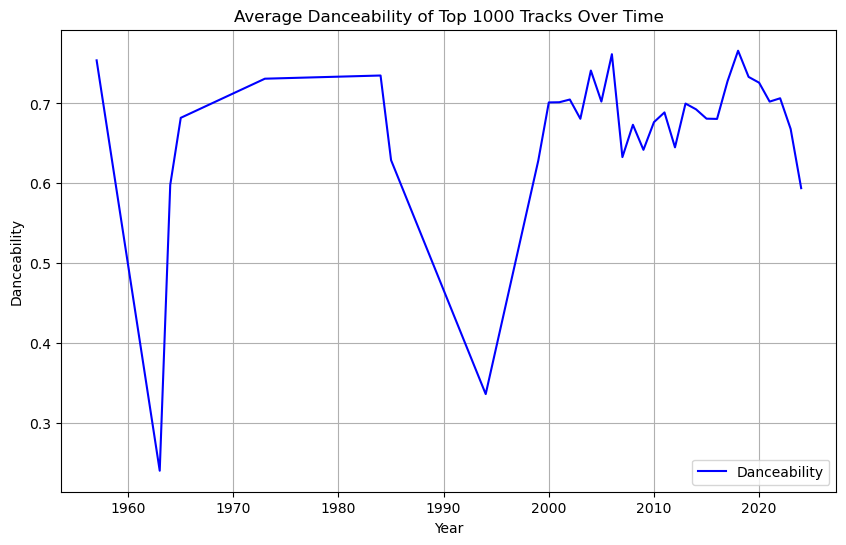

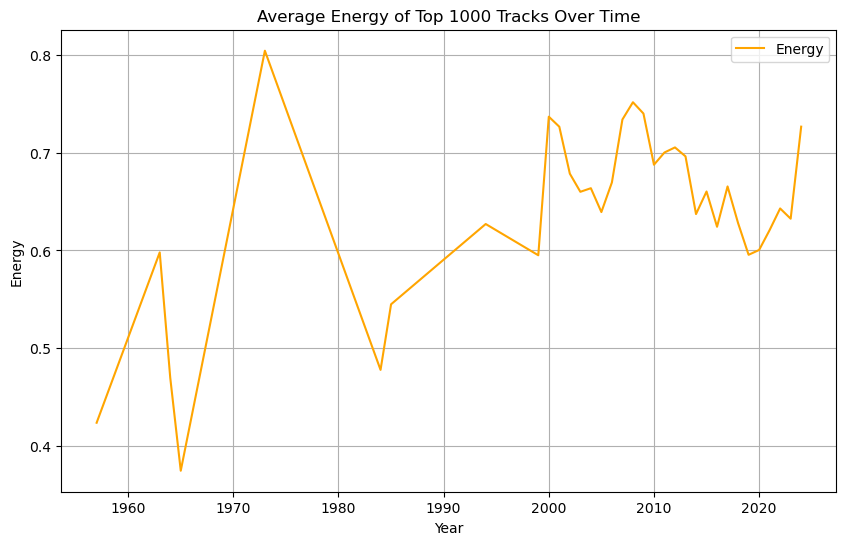

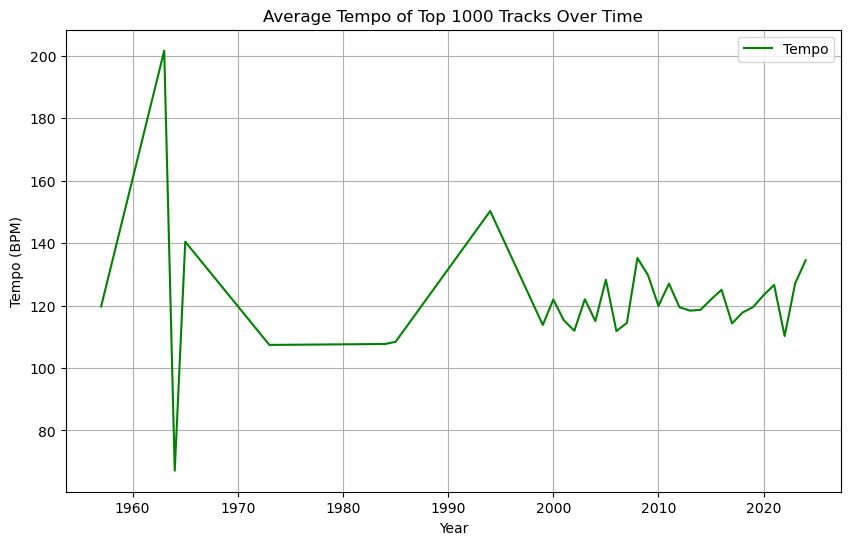

In [391]:
import pandas as pd
import matplotlib.pyplot as plt

# Handle inconsistent date formats in release_date
def clean_release_date(date):
    try:
        # Try parsing as a full date
        return pd.to_datetime(date, format='%Y-%m-%d', errors='coerce')
    except:
        try:
            # Try parsing as a year only
            return pd.to_datetime(date, format='%Y', errors='coerce')
        except:
            return None

# Apply the function to clean release_date
top_1000_with_details['release_date'] = top_1000_with_details['release_date'].apply(clean_release_date)

# Drop rows where release_date could not be parsed
top_1000_with_details = top_1000_with_details.dropna(subset=['release_date'])

# Extract release_year from cleaned release_date
top_1000_with_details['release_year'] = top_1000_with_details['release_date'].dt.year

# Group by release_year to calculate average audio features
feature_trends = top_1000_with_details.groupby('release_year')[['danceability', 'energy', 'tempo']].mean().dropna()

# Visualization: Average Danceability Over Time
plt.figure(figsize=(10, 6))
plt.plot(feature_trends.index, feature_trends['danceability'], label='Danceability', color='blue')
plt.title('Average Danceability of Top 1000 Tracks Over Time')
plt.xlabel('Year')
plt.ylabel('Danceability')
plt.grid(True)
plt.legend()
plt.show()

# Visualization: Average Energy Over Time
plt.figure(figsize=(10, 6))
plt.plot(feature_trends.index, feature_trends['energy'], label='Energy', color='orange')
plt.title('Average Energy of Top 1000 Tracks Over Time')
plt.xlabel('Year')
plt.ylabel('Energy')
plt.grid(True)
plt.legend()
plt.show()

# Visualization: Average Tempo Over Time
plt.figure(figsize=(10, 6))
plt.plot(feature_trends.index, feature_trends['tempo'], label='Tempo', color='green')
plt.title('Average Tempo of Top 1000 Tracks Over Time')
plt.xlabel('Year')
plt.ylabel('Tempo (BPM)')
plt.grid(True)
plt.legend()
plt.show()


# Artist Influence on Track Audio Features:

Question: Do artists with higher popularity scores produce tracks with specific audio feature profiles?

### 1. Merge Artist Popularity with Track Audio Features

In [393]:
# Merge artist data with track data on artist_id
artist_track_data = pd.merge(
    master_data[['track_id', 'artist_id', 'danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness']],
    master_data[['artist_id', 'artist_name', 'popularity']].drop_duplicates(),
    on='artist_id',
    how='inner'
)

# Check the merged data
print(artist_track_data.head())

                 track_id               artist_id  danceability  energy  \
0  5CMVGP24paZIukljDj0iWc  0TPlgv7eySSCChc2vKRIml         0.542   0.159   
1  5CMVGP24paZIukljDj0iWc  0TPlgv7eySSCChc2vKRIml         0.542   0.159   
2  5CMVGP24paZIukljDj0iWc  1Mxqyy3pSjf8kZZL4QVxS0         0.542   0.159   
3  5CMVGP24paZIukljDj0iWc  1Mxqyy3pSjf8kZZL4QVxS0         0.542   0.159   
4  25leEEaz1gIpp7o21Fqyjo  5ixB75BQR3ADoWQkcHQJTs         0.834   0.371   

   valence    tempo  acousticness  instrumentalness       artist_name  \
0    0.634  137.569         0.868               0.0  Ken Lane Singers   
1    0.634  137.569         0.868               0.0  Ken Lane Singers   
2    0.634  137.569         0.868               0.0     Frank Sinatra   
3    0.634  137.569         0.868               0.0     Frank Sinatra   
4    0.976   96.628         0.799               0.0        Gene Autry   

   popularity  
0          28  
1          28  
2          79  
3          79  
4          48  


### 2. Analyze Correlation Between Popularity and Audio Features 

In [394]:
# Correlation analysis between popularity and audio features
correlation_results = artist_track_data[['popularity', 'danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness']].corr()

# Display the correlation matrix
print(correlation_results)

                  popularity  danceability    energy   valence     tempo  \
popularity          1.000000      0.022526 -0.000576 -0.124027  0.006005   
danceability        0.022526      1.000000 -0.086569  0.314189 -0.192260   
energy             -0.000576     -0.086569  1.000000  0.381319  0.101175   
valence            -0.124027      0.314189  0.381319  1.000000 -0.004136   
tempo               0.006005     -0.192260  0.101175 -0.004136  1.000000   
acousticness        0.009019     -0.146526 -0.465288 -0.128294 -0.064512   
instrumentalness   -0.357433      0.005935 -0.093189 -0.051766  0.031222   

                  acousticness  instrumentalness  
popularity            0.009019         -0.357433  
danceability         -0.146526          0.005935  
energy               -0.465288         -0.093189  
valence              -0.128294         -0.051766  
tempo                -0.064512          0.031222  
acousticness          1.000000          0.006072  
instrumentalness      0.006072    

### 3. Visualize Correlations

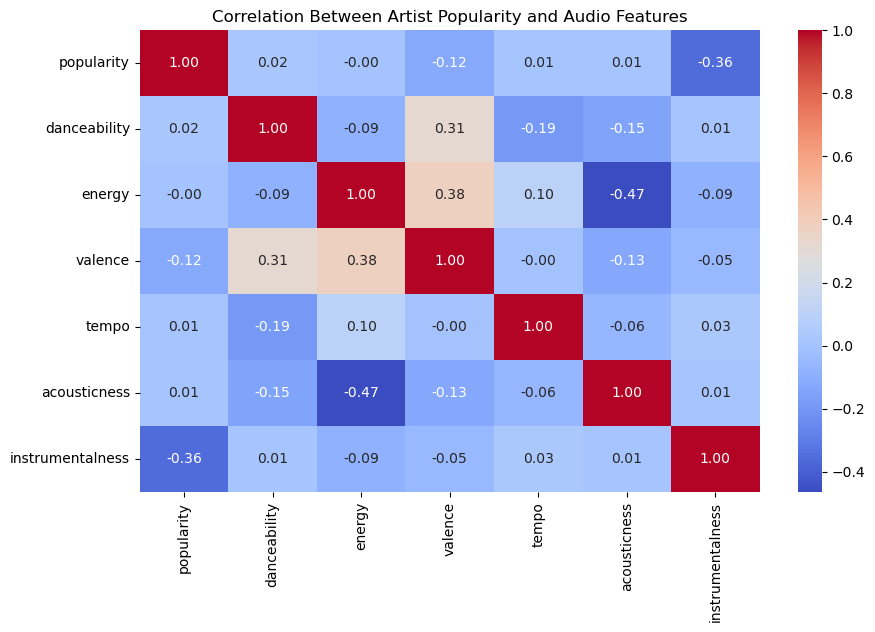

In [395]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_results, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Artist Popularity and Audio Features')
plt.show()

### 5. Analyze Average Features by Popularity Groups
Group artists by popularity ranges to see trends in audio features.

                  danceability    energy   valence       tempo  acousticness  \
popularity_group                                                               
Low                   0.698956  0.598395  0.555360  125.478759      0.135594   
Moderate              0.660046  0.672406  0.569511  119.783385      0.160768   
High                  0.643772  0.688715  0.541451  121.332380      0.168025   
Very High             0.676569  0.668480  0.498424  121.814170      0.158425   

                  instrumentalness  
popularity_group                    
Low                       0.425512  
Moderate                  0.027702  
High                      0.005933  
Very High                 0.005615  


/var/folders/ps/fp_c38sd6b18sp_b6z03ssw80000gn/T/ipykernel_55939/3296861115.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_features_by_popularity = artist_track_data.groupby('popularity_group')[['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness']].mean()


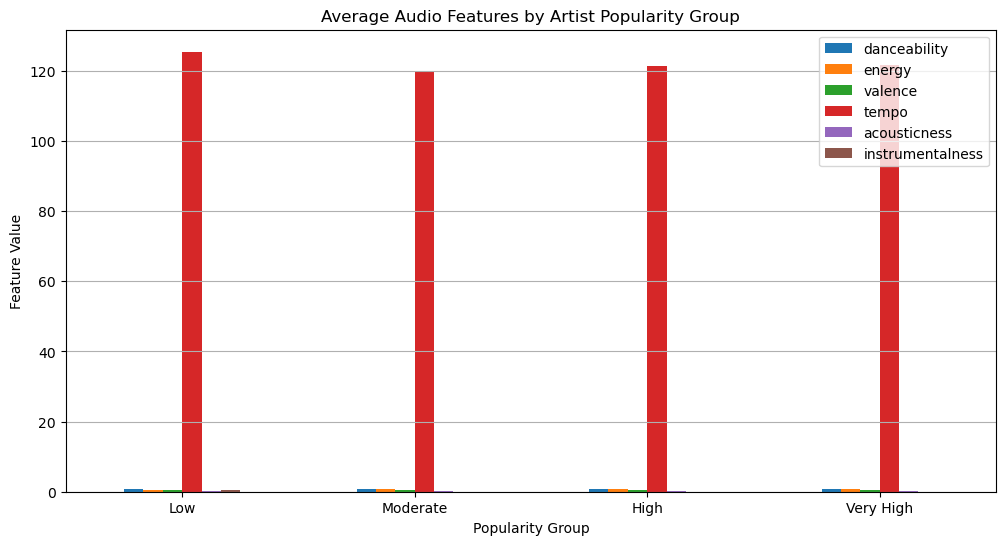

In [396]:
# Define popularity ranges
artist_track_data['popularity_group'] = pd.cut(
    artist_track_data['popularity'], bins=[0, 20, 50, 75, 100], labels=['Low', 'Moderate', 'High', 'Very High']
)

# Calculate average audio features by popularity group
avg_features_by_popularity = artist_track_data.groupby('popularity_group')[['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness']].mean()

# Display the results
print(avg_features_by_popularity)

# Bar plot for visualization
avg_features_by_popularity.plot(kind='bar', figsize=(12, 6))
plt.title('Average Audio Features by Artist Popularity Group')
plt.ylabel('Feature Value')
plt.xlabel('Popularity Group')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()

## Seasonal_Trends

In [1]:
#Are there seasonal trends in the energy, tempo, and danceability of popular tracks? 
# For example, are upbeat tracks more popular during summer festivals?



-----------

# ile

In [68]:
# Inspect columns
pd.options.display.max_rows = 80
master_data.head()

track_id                                         track_name  \
0  5CMVGP24paZIukljDj0iWc           Jingle Bells (with The Ken Lane Singers)   
1  5CMVGP24paZIukljDj0iWc           Jingle Bells (with The Ken Lane Singers)   
2  5CMVGP24paZIukljDj0iWc           Jingle Bells (with The Ken Lane Singers)   
3  5CMVGP24paZIukljDj0iWc           Jingle Bells (with The Ken Lane Singers)   
4  25leEEaz1gIpp7o21Fqyjo  Here Comes Santa Claus (Right Down Santa Claus...   

   duration_ms release_date   album_type  explicit  year  month  day  \
0       156666         1945  compilation     False  1945      0    0   
1       156666         1945  compilation     False  1945      0    0   
2       156666         1945  compilation     False  1945      0    0   
3       156666         1945  compilation     False  1945      0    0   
4       150266         1947        album     False  1947      0    0   

                artist_id       artist_name  popularity  followers  \
0  0TPlgv7eySSCChc2vKRIml  Ken Lane Singers          28        151   
1  0TPlgv7eySSCChc2vKRIml  Ken Lane Singers          28        151   
2  1Mxqyy3pSjf8kZZL4QVxS0     Frank Sinatra          79    7480976   
3  1Mxqyy3pSjf8kZZL4QVxS0     Frank Sinatra          79    7480976   
4  5ixB75BQR3ADoWQkcHQJTs        Gene Autry          48      71266   

   chart_week  list_position  danceability  energy  key  loudness  mode  \
0  2023-12-30             16         0.542   0.159    8   -14.405     1   
1  2024-01-06             16         0.542   0.159    8   -14.405     1   
2  2023-12-30             16         0.542   0.159    8   -14.405     1   
3  2024-01-06             16         0.542   0.159    8   -14.405     1   
4  2024-01-06             21         0.834   0.371    1   -11.990     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0294         0.868               0.0    0.0774    0.634  137.569   
1       0.0294         0.868               0.0    0.0774    0.634  137.569   
2       0.0294         0.868               0.0    0.0774    0.634  137.569   
3       0.0294         0.868               0.0    0.0774    0.634  137.569   
4       0.0358         0.799               0.0    0.2750    0.976   96.628   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

### What are the common features of tracks with high popularity?

In [101]:
tracks_sorted_by_popularity = master_data.sort_values(by='popularity', ascending=False)[['track_name', 'artist_name', 'popularity', 'danceability', 'energy', 'valence', 'liveness', 'tempo', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness']]
tracks_sorted_by_popularity.head(10)

track_name   artist_name  popularity  danceability  energy  \
91027  You Need To Calm Down  Taylor Swift         100         0.771   0.671   
91054                  Lover  Taylor Swift         100         0.359   0.543   
91052                  Lover  Taylor Swift         100         0.359   0.543   
91051                  Lover  Taylor Swift         100         0.359   0.543   
91050                  Lover  Taylor Swift         100         0.359   0.543   
91049                  Lover  Taylor Swift         100         0.359   0.543   
91048             The Archer  Taylor Swift         100         0.292   0.574   
91047             The Archer  Taylor Swift         100         0.292   0.574   
91046             The Archer  Taylor Swift         100         0.292   0.574   
91045  You Need To Calm Down  Taylor Swift         100         0.771   0.671   

       valence  liveness    tempo  loudness  mode  speechiness  acousticness  \
91027    0.714    0.0637   85.026    -5.617     1       0.0553       0.00929   
91054    0.453    0.1180   68.534    -7.582     1       0.0919       0.49200   
91052    0.453    0.1180   68.534    -7.582     1       0.0919       0.49200   
91051    0.453    0.1180   68.534    -7.582     1       0.0919       0.49200   
91050    0.453    0.1180   68.534    -7.582     1       0.0919       0.49200   
91049    0.453    0.1180   68.534    -7.582     1       0.0919       0.49200   
91048    0.166    0.0663  124.344    -9.375     1       0.0401       0.12000   
91047    0.166    0.0663  124.344    -9.375     1       0.0401       0.12000   
91046    0.166    0.0663  124.344    -9.375     1       0.0401       0.12000   
91045    0.714    0.0637   85.026    -5.617     1       0.0553       0.00929   

       instrumentalness  
91027          0.000000  
91054          0.000016  
91052          0.000016  
91051          0.000016  
91050          0.000016  
91049          0.000016  
91048          0.005690  
91047          0.005690  
91046          0.005690  
91045          0.000000

'Loudness' doesn't make sense - all values are negative. <br>
'Instrumentalness' doesn't make sense (predicts whether a track contains no vocals) - very low number <br>
'Tempo' is BPM, not a 1-100 score.


In [104]:
# Define popularity threshold for high popularity
popularity_threshold = 80

# Filter tracks with high popularity
high_popularity_tracks = master_data[master_data['popularity'] >= popularity_threshold]

# Select features to analyze
features = ['danceability', 'energy', 'valence', 'speechiness', 'acousticness', 'liveness']

# Calculate average values of the features for high popularity tracks
common_features = high_popularity_tracks[features].mean()

# Display the common features of tracks with high popularity
print("Common features of tracks with high popularity:")
common_features

Common features of tracks with high popularity:


danceability    0.681916
energy          0.661117
valence         0.493502
speechiness     0.125769
acousticness    0.160865
liveness        0.181799
dtype: float64

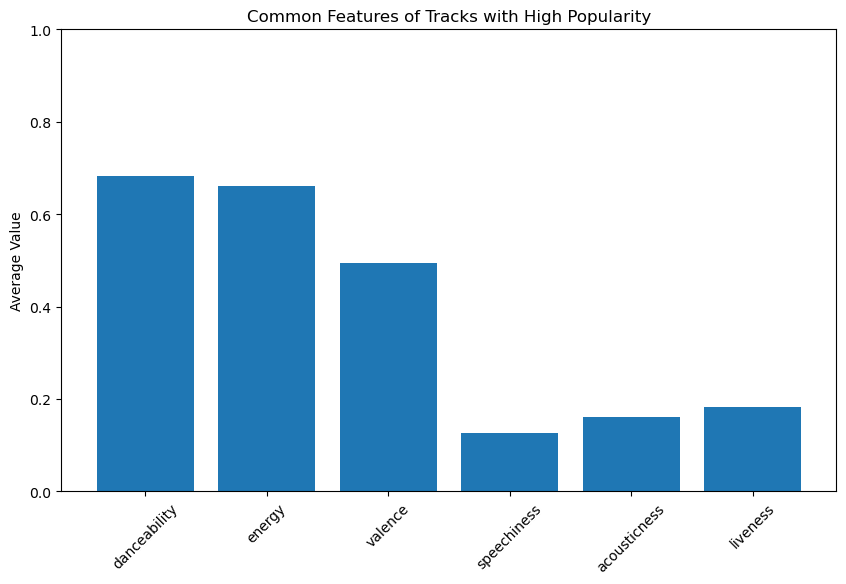

In [105]:
# Visualize the common features with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(common_features.index, common_features.values)
plt.title('Common Features of Tracks with High Popularity')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Adjust if any feature has values outside 0 to 1
plt.show()

### What are the common features of tracks with high danceability?

Common features of tracks with high danceability:


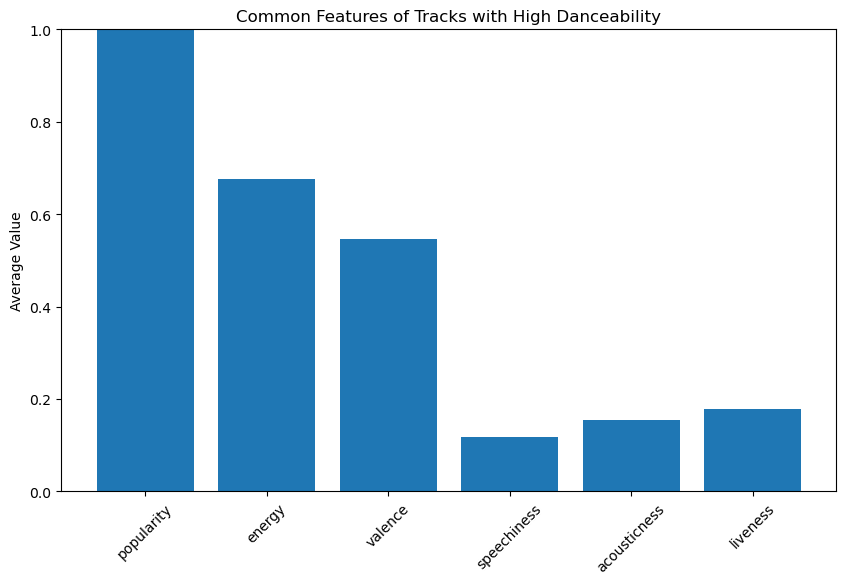

In [116]:
# Define danceability threshold for high popularity
danceability_threshold = 0.5

# Filter tracks with high danceability
high_danceability_tracks = master_data[master_data['danceability'] >= danceability_threshold]

# Select features to analyze
features = ['popularity', 'energy', 'valence', 'speechiness', 'acousticness', 'liveness']

# Calculate average values of the features for high danceability tracks
common_features = high_danceability_tracks[features].mean()

# Display the common features of tracks with high danceability
print("Common features of tracks with high danceability:")
common_features

# Visualize the common features with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(common_features.index, common_features.values)
plt.title('Common Features of Tracks with High Danceability')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Adjust if any feature has values outside 0 to 1
plt.show()

### What are the common features of tracks with high valence?

Common features of tracks with high valence:


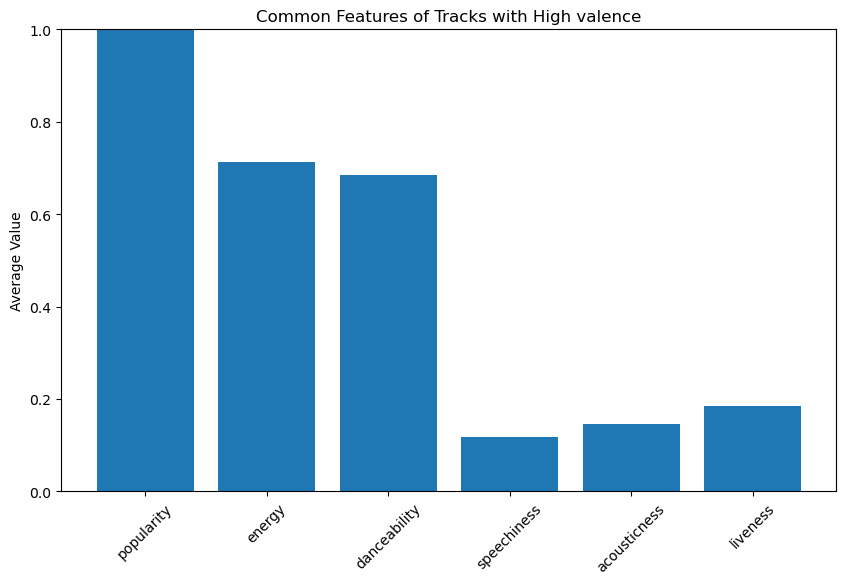

In [117]:
# Define threshold for high valence
valence_threshold = 0.4

# Filter tracks with high valence
high_valence_tracks = master_data[master_data['valence'] >= valence_threshold]

# Select features to analyze
features = ['popularity', 'energy', 'danceability', 'speechiness', 'acousticness', 'liveness']

# Calculate average values of the features for high valence tracks
common_features = high_valence_tracks[features].mean()

# Display the common features of tracks with high valence
print("Common features of tracks with high valence:")
common_features

# Visualize the common features with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(common_features.index, common_features.values)
plt.title('Common Features of Tracks with High valence')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Adjust if any feature has values outside 0 to 1
plt.show()

### What's the average tempo of tracks with high popularity and danceability?

In [118]:
# Define thresholds for high popularity and high danceability
popularity_threshold = 80  # Assuming popularity is on a scale of 0-100
danceability_threshold = 0.5  # Assuming danceability is normalized between 0 and 1

# Filter tracks with high popularity and high danceability
high_popularity_danceability_tracks = master_data[
    (master_data['popularity'] >= popularity_threshold) &
    (master_data['danceability'] >= danceability_threshold)
]

# Calculate the average tempo for the filtered tracks
average_tempo = high_popularity_danceability_tracks['tempo'].mean()

# Display the average tempo
print("The average tempo of tracks with high popularity and high danceability is:", average_tempo)

The average tempo of tracks with high popularity and high danceability is: 121.28752961740142


It's not very relevant.

In [121]:
# Average tempo of tracks with high popularity: 
popularity_threshold = 80  

high_popularity_tracks = master_data[
    (master_data['popularity'] >= popularity_threshold)
]

# Calculate the average tempo for the filtered tracks
average_tempo_popularity = high_popularity_tracks['tempo'].mean()

print("The average tempo of tracks with high popularity is:", average_tempo_popularity)

The average tempo of tracks with high popularity is: 122.0446324173825


In [122]:
# Average tempo of tracks with high danceability: 
danceability_threshold = 0.5

high_danceability_tracks = master_data[
    (master_data['danceability'] >= danceability_threshold)
]

# Calculate the average tempo for the filtered tracks
average_tempo_danceability = high_danceability_tracks['tempo'].mean()

print("The average tempo of tracks with high danceability is:", average_tempo_danceability)

The average tempo of tracks with high danceability is: 119.57911258518673


### Is there a predominant mode in high popular songs? 

In [123]:
# Define popularity threshold for high popularity
popularity_threshold = 80  # Assuming popularity is on a scale of 0-100

# Filter tracks with high popularity
high_popularity_tracks = master_data[master_data['popularity'] >= popularity_threshold]

# Count the number of tracks in each mode (major or minor)
mode_counts = high_popularity_tracks['mode'].value_counts()

# Map the mode values to their respective names
mode_counts.index = mode_counts.index.map({1: 'Major', 0: 'Minor'})

# Display the counts of major and minor modes in high popular songs
print("Counts of Major and Minor Modes in High Popular Songs:", mode_counts)

Counts of Major and Minor Modes in High Popular Songs: mode
Major    36889
Minor    26324
Name: count, dtype: int64


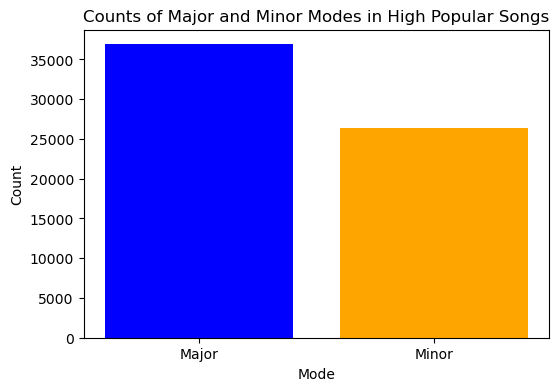

In [124]:
# Visualize the counts with a simple bar chart
plt.figure(figsize=(6, 4))
plt.bar(mode_counts.index, mode_counts.values, color=['blue', 'orange'])
plt.title('Counts of Major and Minor Modes in High Popular Songs')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()

### Is there a predominant mode with high danceability?

Counts of Major and Minor Modes in High Danceability Songs:
mode
Major    95680
Minor    55752
Name: count, dtype: int64


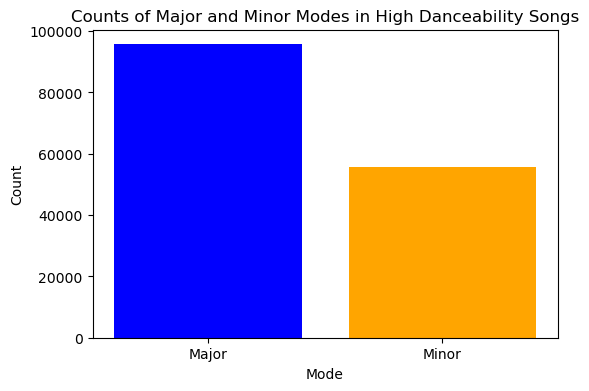

In [125]:
# Define danceability threshold for high danceability
danceability_threshold = 0.5  # Assuming danceability is normalized between 0 and 1

# Filter tracks with high danceability
high_danceability_tracks = master_data[master_data['danceability'] >= danceability_threshold]

# Count the number of tracks in each mode (major or minor)
mode_counts = high_danceability_tracks['mode'].value_counts()

# Map the mode values to their respective names
mode_counts.index = mode_counts.index.map({1: 'Major', 0: 'Minor'})

# Display the counts of major and minor modes in high danceability songs
print("Counts of Major and Minor Modes in High Danceability Songs:")
print(mode_counts)

# Visualize the counts with a simple bar chart
plt.figure(figsize=(6, 4))
plt.bar(mode_counts.index, mode_counts.values, color=['blue', 'orange'])
plt.title('Counts of Major and Minor Modes in High Danceability Songs')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()

In [ ]:
# Create a function to get the top all-time list_position for each track
def get_top_all_time_position(data, top_tracks):
    """
    Finds the top all-time list_position for each track in the given top tracks dataset,
    ensuring unique track names are included.
    """
    # Filter the master_data to show only the tracks in the top_tracks
    top_tracks_data = data[data['track_name'].isin(top_tracks['track_name'])]

    # Remove duplicate track names by keeping the first occurrence and dropping the rest
    top_tracks_data = top_tracks_data.drop_duplicates(subset='track_name')

    # Find the best all-time list_position for each track
    top_all_time_position = top_tracks_data.groupby(['track_name', 'artist_name']).agg({
        'list_position': 'min'  # Lowest chart position since 1 is the highest
    }).reset_index()

    # Rename the list_position column here since it's now showing the top list position of all time
    top_all_time_position.rename(columns={'list_position': 'top_all_time_position'}, inplace=True)
    return top_all_time_position

# Variables for the top 10 tracks without and with "feat"
top_without_feat = get_top_songs(master_data, contains_feat=False, top_n=10)
top_with_feat = get_top_songs(master_data, contains_feat=True, top_n=10)

# Variables for the top all-time positions for each set
top_all_time_without_feat = get_top_all_time_position(master_data, top_without_feat)
top_all_time_with_feat = get_top_all_time_position(master_data, top_with_feat)

# Print the results to check the code so far
print("Top All-Time List Positions for Tracks Without 'feat':")
print(top_all_time_without_feat)

print("\nTop All-Time List Positions for Tracks With 'feat':")
print(top_all_time_with_feat)

In [ ]:
# The code above is a good start but the results aren't really helpful

# Function to calculate performance metrics
def analyze_performance(top_all_time_without_feat, top_all_time_with_feat):
    """
    Compares the performance of tracks with 'feat' in the name versus those without.
    Metrics used: average of top all-time positions.
    """
    # Calculate the average of the top all-time positions for each group
    avg_without_feat = top_all_time_without_feat['top_all_time_position'].mean()
    avg_with_feat = top_all_time_with_feat['top_all_time_position'].mean()

    # Use conditional statements to see which group of tracks performs better
    if avg_without_feat < avg_with_feat:
        better_group = "Tracks Without 'feat'"
    elif avg_with_feat < avg_without_feat:
        better_group = "Tracks With 'feat'"
    else:
        better_group = "Both perform equally"

    # Print the results of the analysis in an easy to read way
    print(f"Average Top All-Time Position for Tracks Without 'feat': {avg_without_feat:.2f}")
    print(f"Average Top All-Time Position for Tracks With 'feat': {avg_with_feat:.2f}")
    print(f"\nConclusion: {better_group} perform better.")
    
    return {
        "avg_without_feat": avg_without_feat,
        "avg_with_feat": avg_with_feat,
        "better_group": better_group
    }

# Print out the performance based on the results
results = analyze_performance(top_all_time_without_feat, top_all_time_with_feat)

### next?